In [49]:
from keras.models import load_model
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt

img_folder=r'C:\Users\Kamil Ogrodowski\Desktop\Obrazowanie\218447-medical_imaging-788b05f861ac\predict2'
img_width = 100
img_height = 100

def read_img(fileid):
    """
    Read and resize img, adjust channels. 
    Caution: This function is not independent, it uses global vars: img_folder, img_channels
    @param file: file id, int
    """
    img = skimage.io.imread(img_folder+ '\\' + str(fileid) + '.jpeg')
    img = skimage.transform.resize(img, (img_width, img_height), mode='reflect')
    # A few image are grey, duplicate them for to have 3 alpha channels.
    if(len(img.shape) < 3):
        img = np.dstack([img, img, img])
    return img

#wystarczy zmienic nazwe modelu
model1 = load_model('deepAutoencoderV1.h5')

In [50]:
d = {'Id' : pd.Series(['2715708', '3752954','3762190', '4461156', '4791430', '5071859', '6122401', '6452182', '7427938', '10269228','10382714', '10700934', '11976787', '12707748', '13035042', '14622599', '16902046', '17030470', '17811736', '18218886'])}
data = pd.DataFrame(d)

In [51]:
test = np.stack(data['Id'].apply(read_img))

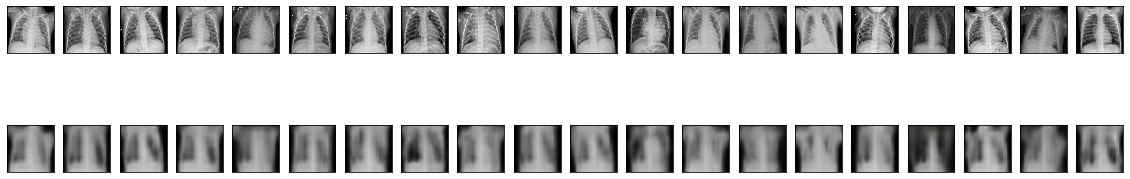

In [52]:
decoded_imgs = model1.predict(test)
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i].reshape(100, 100, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(100, 100, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [53]:
from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_psnr as psnr
ssim_table = []
for i in range(n):
    ssim_table.append(ssim(test[i].reshape(100, 100, 3), decoded_imgs[i].reshape(100, 100, 3), data_range=decoded_imgs[i].reshape(100, 100, 3).max() - decoded_imgs[i].reshape(100, 100, 3).min(), multichannel=True))
ssim_table

[0.43638225522252583,
 0.4020111403178952,
 0.408382203762703,
 0.40153390805463496,
 0.4735514707979595,
 0.3665500921751081,
 0.4770538219602562,
 0.34670248812396065,
 0.31041754869435895,
 0.5503205898149612,
 0.4130920019555772,
 0.34603968785313244,
 0.4863832801151857,
 0.5175244314200317,
 0.49307124847459555,
 0.369542710420736,
 0.4159368691815528,
 0.3632819428032475,
 0.4758865078895022,
 0.3730125776548139]

In [54]:
#PSNR high means: Mean square error between the original image and reconstructed image is very low. It implies that the the has been properly restored. In the other way, the restored image quality is better.
#If PSNR value is low; the quality of the restored image is very bad. 
psnr_table = []
for i in range(n):
    psnr_table.append(psnr(test[i].reshape(100, 100, 3), decoded_imgs[i].reshape(100, 100, 3), data_range=decoded_imgs[i].reshape(100, 100, 3).max() - decoded_imgs[i].reshape(100, 100, 3).min()))
psnr_table

[16.95376752391179,
 17.25675904073318,
 15.861534378288216,
 17.259520352873,
 18.06824946825243,
 17.61882903550644,
 17.13557625888551,
 15.835102488139706,
 16.556549914187922,
 19.434623464615463,
 15.966143481821724,
 16.307558378326657,
 18.146079336048018,
 19.603038203573696,
 17.019606426211812,
 16.268548777316912,
 19.375866786901042,
 14.957964514256156,
 19.58282600515059,
 15.259748515341231]

In [55]:
import matplotlib
for i in range(n):
    matplotlib.image.imsave(str(i) +'.png', test[i])
    matplotlib.image.imsave(str(i) +'d.png', decoded_imgs[i])


In [57]:
import os
for i in range(n):
    print(str(i) + ': '+ str(os.path.getsize(str(i)+'.png')))
    print(str(i) + 'd: ' + str(os.path.getsize(str(i)+'d.png')))
    print('')

0: 13060
0d: 11427

1: 13763
1d: 10581

2: 13613
2d: 11801

3: 13015
3d: 11087

4: 12510
4d: 10265

5: 13269
5d: 10168

6: 12652
6d: 10688

7: 15233
7d: 12131

8: 14157
8d: 10913

9: 11211
9d: 10155

10: 12904
10d: 11000

11: 12720
11d: 10695

12: 11913
12d: 10793

13: 10795
13d: 10019

14: 11669
14d: 11057

15: 13575
15d: 10056

16: 11923
16d: 10237

17: 14876
17d: 12482

18: 11106
18d: 10193

19: 13604
19d: 12227

